This dataset contain information of users from a companies database....

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded=files.upload()


Saving User_Data.csv to User_Data.csv


In [ ]:
dataset=pd.read_csv("User_Data.csv")
dataset.shape

(400, 5)

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
#user id and gender is of no use to predict the purchased item
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() #it will shift our data to 0 mean and 1 standard deviation
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
print(x_train[0:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


68 users are from class 0,
65 are truly classified.
32 users are from class 1
,24 are truly classified

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.89


2nd Example ---

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#use seaborn plotting defaults
import seaborn as sns; sns.set()

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


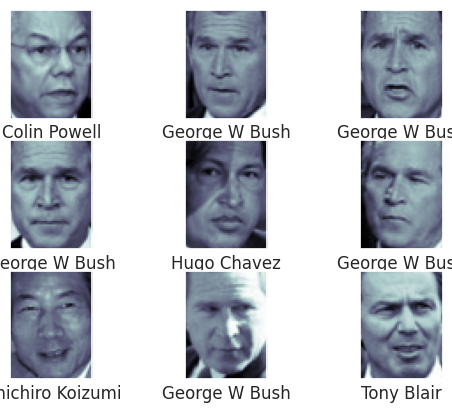

In [ ]:
fig,ax=plt.subplots(3,3)
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i],cmap="bone")
  axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(faces.data,faces.target,random_state=42)
model.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
yfit=model.predict(X_test)
yfit

array([3, 0, 3, 6, 6, 1, 3, 3, 3, 1, 3, 3, 4, 3, 2, 1, 3, 2, 3, 2, 7, 3,
       5, 5, 0, 3, 6, 7, 3, 3, 0, 6, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 7, 1,
       3, 3, 3, 2, 1, 2, 7, 3, 4, 6, 7, 3, 7, 1, 7, 0, 4, 3, 7, 2, 5, 4,
       7, 3, 4, 5, 1, 3, 4, 1, 3, 4, 0, 4, 3, 3, 1, 3, 1, 0, 3, 2, 3, 2,
       7, 1, 1, 1, 2, 7, 3, 3, 7, 3, 3, 3, 3, 7, 1, 4, 3, 3, 0, 3, 7, 0,
       3, 1, 0, 7, 3, 1, 3, 2, 7, 4, 7, 7, 5, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       0, 3, 4, 3, 4, 1, 3, 1, 7, 6, 5, 3, 3, 1, 1, 3, 5, 4, 3, 3, 7, 1,
       7, 1, 3, 0, 1, 4, 6, 1, 7, 3, 2, 3, 1, 7, 2, 2, 1, 7, 3, 3, 1, 1,
       1, 3, 3, 1, 0, 0, 1, 1, 7, 1, 1, 5, 3, 4, 3, 3, 4, 4, 6, 3, 7, 7,
       3, 2, 3, 3, 2, 3, 3, 6, 3, 3, 1, 7, 3, 6, 1, 2, 3, 1, 1, 7, 6, 3,
       1, 3, 4, 7, 7, 2, 7, 7, 5, 7, 1, 3, 3, 3, 4, 4, 7, 3, 3, 1, 3, 4,
       7, 1, 4, 3, 1, 1, 5, 4, 2, 3, 4, 1, 1, 1, 2, 2, 3, 3, 3, 7, 3, 7,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 4, 4, 3, 1, 4, 1, 4, 0, 3, 3, 0,
       2, 3, 1, 3, 3, 6, 7, 1, 3, 6, 0, 1, 3, 5, 3,

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

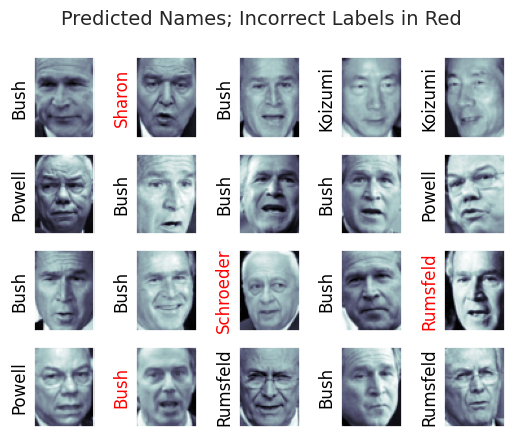

In [ ]:
fig, ax=plt.subplots(4,5)
for i,axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62,47),cmap="bone")
  axi.set(xticks=[],yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color="black" if yfit[i]==Y_test[i] else "red")
fig.suptitle("Predicted Names; Incorrect Labels in Red",size=14)

In [ ]:
#classification report:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,yfit,target_names=faces.target_names))
cm=confusion_matrix(Y_test,yfit)
print(cm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.61      0.73      0.67        15
     Colin Powell       0.88      0.87      0.87        68
  Donald Rumsfeld       0.80      0.65      0.71        31
    George W Bush       0.85      0.87      0.86       126
Gerhard Schroeder       0.64      0.78      0.71        23
      Hugo Chavez       0.92      0.60      0.73        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.86      0.84        42

         accuracy                           0.82       337
        macro avg       0.80      0.79      0.79       337
     weighted avg       0.83      0.82      0.82       337

[[ 11   0   2   1   1   0   0   0]
 [  1  59   1   5   0   0   0   2]
 [  1   3  20   5   0   0   0   2]
 [  2   5   2 109   4   1   1   2]
 [  2   0   0   1  18   0   1   1]
 [  0   0   0   2   5  12   0   1]
 [  0   0   0   0   0   0  12   0]
 [  1   0   0   5   0   0   0  36]]
